In [1]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.4em;
}
</style>
""")

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.core.display import Image

In [3]:
%display latex

# Computing Modular Cohomology Rings of Finite Groups with SageMath
##### Simon King (FSU Jena), 2019
###### based on joint work with Graham Ellis, Bettina Eick, David Green

1. History and installation
2. Computing cohomology rings
3. Invariants
4. Induced homomorphisms, essential ideals, bar codes
5. Detecting isomorphic rings

## 1. History and installation

#### Why Sagemath?

Modular cohomology computations involve a variety of computational tasks, for which we use the following resources:
- *Initial segments of minimal projective resolutions* of $\mathbb F_pG$ where $G$ is a finite $p$-group: C code (David Green) using MeatAxe (Klaus Lux, Michael Ringe; or rather a fork maintained by S.K.) as back-end for linear algebra.
- *Construction of special subgroups*: GAP code (David Green), SmallGroups library (Ulrich Besche, Bettina Eick, Eamann O'Brian)
- *Cochains, induced maps, stable elemeint method etc.*: Cython, Python code (S.K.)
- *Gröbner bases in graded-commutative rings*: Singular (Wolfram Decker, Gert-Martin Greuel, Gerhard Pfister, and Hans Schönemann)
- *Poincaré series*: New implementation in SageMath (S.K.)

When we started our project in 2008, SageMath was the only free open source platform providing a framework for all of the above.

#### Performance

We computed modular cohomology rings (for various primes) of ...
 - all groups of order 128 (with David Green, 2009),
 - the first three Janko groups,
 - Mathieu groups 11, 12, 22 and 23,
 - the McLaughlin group,
 - SuzukiGroup(8),
 - the Higman-Sims group and
 - the third Conway group (with David Green, Graham Ellis, 2011).

Comparison: The first complete computation for all groups of order 64 (Carlson, 1997--2001) took about 8 months CPU time on SUN ULTRA 2200 (200 MHz clock speed?). With the latest version of p_group_cohomology, it takes about 7 minutes on this laptop (2.60 GHz clock speed).

#### Documentation and installation

The documentation and computational results can be found starting at https://users.fmi.uni-jena.de/~king/cohomology/. The current "official" version `p_group_cohomology-3.1` can be installed in SageMath by
    
    sage -i meataxe             # installs an optional package
    sage -b                     # builds some modules in the SageMath library
    sage -i p_group_cohomology
    
Part of what we are presenting here is not in version 3.1 yet but will be part of version 3.2 --- see trac ticket https://trac.sagemath.org/ticket/28204

## 2. Computing cohomology rings

Let's import the interface to the cohomology package:

In [4]:
from pGroupCohomology import CohomologyRing

We will see below that the computation of one cohomology ring may involve the computation of various other rings. And data of one ring can be huge. Therefore, those parts of the data that aren't actively used will be stored on disk in a location we call the *workspace*. There is a default location, but just for this talk I'm using a temporary folder:

In [5]:
CohomologyRing.set_workspace(tmp_dir())

##### Data sources

The package is shipped with the modular cohomology rings of all groups of order 64. This "local source" is shared by all users of a SageMath installation and can of course be extended.

If a ring can not be found in the user's workspace nor in the local sources, a "web source" is accessed (unless web access is disallowed).

The cohomology ring is determined either...
 - by the address of a group in the SmallGroups library,
 - by a group defined in SageMath's interface to the GAP interpreter, or
 - a tower of subgroups starting with a Sylow subgroup

and a prime number if it isn't clear from the context. There are further options, e.g., in some of our examples we use logging:

In [6]:
H64gp158 = CohomologyRing(64, 158, options='info') # This is from the local sources

Resolution of GF(2)[64gp158]: 
          Differential reloaded
          > rk P_02 =   4
          Differential reloaded
          > rk P_03 =   4
          Differential reloaded
          > rk P_04 =   6
          Differential reloaded
          > rk P_05 =   9
          Differential reloaded
          > rk P_06 =   9
H^*(SmallGroup(64,158); GF(2)): 
          Import monomials
Checking compatibility of SmallGroups library and stored cohomology ring


The ring is loaded from disk and already is completely known:

In [7]:
H64gp158
print H64gp158

H^*(SmallGroup(64,158); GF(2))


Cohomology ring of Small Group number 158 of order 64 with coefficients in GF(2)

Computation complete
Minimal list of generators:
[c_4_4: 4-Cocycle in H^*(SmallGroup(64,158); GF(2)),
 c_4_5: 4-Cocycle in H^*(SmallGroup(64,158); GF(2)),
 a_1_0: 1-Cocycle in H^*(SmallGroup(64,158); GF(2)),
 a_1_1: 1-Cocycle in H^*(SmallGroup(64,158); GF(2)),
 a_1_2: 1-Cocycle in H^*(SmallGroup(64,158); GF(2)),
 a_3_2: 3-Cocycle in H^*(SmallGroup(64,158); GF(2)),
 a_3_3: 3-Cocycle in H^*(SmallGroup(64,158); GF(2))]
Minimal list of algebraic relations:
[a_1_1^2+a_1_0*a_1_1+a_1_0^2,
 a_1_0*a_1_2,
 a_1_0^3,
 a_1_2^3,
 a_1_0*a_3_2,
 a_1_2*a_3_3,
 a_1_2^2*a_3_2+a_1_0^2*a_3_3,
 a_3_2*a_3_3,
 a_3_2^2+a_1_0^2*a_1_1*a_3_3+c_4_4*a_1_2^2,
 a_3_3^2+c_4_5*a_1_0^2+c_4_4*a_1_0^2]
            


We download an example of order 128, showing that some groups are known under a custom name:

In [8]:
H128gp934 = CohomologyRing(128, 934) # this is from a remote source, provided internet works...

Accessing web
Press Ctrl-c to interrupt web access.
Trying to read downloaded data
Resolution of GF(2)[128gp934]: 
          Differential reloaded
          > rk P_02 =   6
          Differential reloaded
          > rk P_03 =  10
          Differential reloaded
          > rk P_04 =  15
          Differential reloaded
          > rk P_05 =  22
          Differential reloaded
          > rk P_06 =  30
          Differential reloaded
          > rk P_07 =  38
          Differential reloaded
          > rk P_08 =  50
          Differential reloaded
          > rk P_09 =  66
          Differential reloaded
          > rk P_10 =  84
          Differential reloaded
          > rk P_11 = 104
          Differential reloaded
          > rk P_12 = 128
          Differential reloaded
          > rk P_13 = 157
          Differential reloaded
          > rk P_14 = 188
          Differential reloaded
          > rk P_15 = 220
          Differential reloaded
          > rk P_16 = 259
          Diffe

In [9]:
H128gp934
print H128gp934

H^*(Syl2(J2); GF(2))


Cohomology ring of Sylow 2-subgroup of Hall-Janko Group J_2 with coefficients in GF(2)

Computation complete
Minimal list of generators:
[a_2_4: 2-Cocycle in H^*(Syl2(J2); GF(2)),
 a_2_5: 2-Cocycle in H^*(Syl2(J2); GF(2)),
 b_4_14: 4-Cocycle in H^*(Syl2(J2); GF(2)),
 c_8_49: 8-Cocycle in H^*(Syl2(J2); GF(2)),
 b_10_83: 10-Cocycle in H^*(Syl2(J2); GF(2)),
 b_1_0: 1-Cocycle in H^*(Syl2(J2); GF(2)),
 b_1_1: 1-Cocycle in H^*(Syl2(J2); GF(2)),
 b_1_2: 1-Cocycle in H^*(Syl2(J2); GF(2)),
 b_3_8: 3-Cocycle in H^*(Syl2(J2); GF(2)),
 b_3_9: 3-Cocycle in H^*(Syl2(J2); GF(2)),
 b_5_20: 5-Cocycle in H^*(Syl2(J2); GF(2)),
 b_5_21: 5-Cocycle in H^*(Syl2(J2); GF(2))]
Minimal list of algebraic relations:
[b_1_0*b_1_1,
 b_1_0*b_1_2,
 a_2_4*b_1_1,
 a_2_5*b_1_2,
 a_2_5*b_1_1+a_2_4*b_1_2,
 a_2_5^2+a_2_4*a_2_5+a_2_4^2,
 b_1_0*b_3_8+a_2_4^2,
 b_1_0*b_3_9+a_2_5^2,
 a_2_4*b_3_8,
 a_2_5*b_3_9,
 a_2_5*b_3_8+a_2_4*b_3_9,
 b_4_14*b_1_0+a_2_4*b_1_0^3+a_2_4*a_2_5*b_1_0,
 b_3_9^2+b_1_2*b_5_20+b_1_1*b_1_2^2*b_3_8+b_1

Modular cohomology rings can be quite complicated. Our "worst" example: $H^*(Sz(8),\mathbb F_2)$, whose *minimal* ring representation is formed by 109 generators up to degree 29, and 4790 relations up to degree 58.

##### Computation from scratch

If the ring can not be found in the sources or if the user explicitly requests a computation from scratch, only the basic setup of the ring is computed. However, the ring structure is only computed upon request, as it may take very long in some examples:

In [10]:
CohomologyRing.global_options('warn')  # stop logging
HE27 = CohomologyRing(27,3)

In [11]:
HE27        # show a brief description
print HE27  # show the ring structure obtained so far

H^*(E27; GF(3))


Cohomology ring of Extraspecial 3-group of order 27 and exponent 3 with coefficients in GF(3)

Computed up to degree 0
Minimal list of generators:
[]
Minimal list of algebraic relations:
[]
            


Let's compute the ring structure. The ring structure will be discovered in increasing degree, based on an incremental computation of a minimal projective resolution, and eventually a completeness criterion tells that the computation can be stopped:

In [12]:
HE27.make()

Behind the scenes, a minimal projective resolution is computed using software of David Green. It is based on some kind of *signed standard bases*.

S.K. formulated a non-commutative version of Jean-Charles Faugère's $\mathrm F_5$ algorithm. The $\mathrm F_5$ signature contains more information than the Green signature. It should both be faster and yield more detailed information. **TODO:** Implement it!

In [13]:
print HE27


Cohomology ring of Extraspecial 3-group of order 27 and exponent 3 with coefficients in GF(3)

Computation complete
Minimal list of generators:
[b_2_0: 2-Cocycle in H^*(E27; GF(3)),
 b_2_1: 2-Cocycle in H^*(E27; GF(3)),
 b_2_2: 2-Cocycle in H^*(E27; GF(3)),
 b_2_3: 2-Cocycle in H^*(E27; GF(3)),
 c_6_8: 6-Cocycle in H^*(E27; GF(3)),
 a_1_0: 1-Cocycle in H^*(E27; GF(3)),
 a_1_1: 1-Cocycle in H^*(E27; GF(3)),
 a_3_4: 3-Cocycle in H^*(E27; GF(3)),
 a_3_5: 3-Cocycle in H^*(E27; GF(3))]
Minimal list of algebraic relations:
[a_1_0*a_1_1,
 b_2_1*a_1_0-b_2_0*a_1_1,
 b_2_2*a_1_1+b_2_1*a_1_1-b_2_0*a_1_1,
 b_2_2*a_1_0-b_2_1*a_1_1+b_2_0*a_1_1,
 b_2_3*a_1_0-b_2_0*a_1_1,
 -b_2_1^2+b_2_0*b_2_2+b_2_0*b_2_1,
 -b_2_2^2+b_2_1*b_2_3+b_2_1*b_2_2-b_2_1^2,
 -b_2_1*b_2_2-b_2_1^2+b_2_0*b_2_3,
 -b_2_2^2+b_2_1*b_2_2+a_1_1*a_3_4,
 -b_2_1*b_2_2-b_2_1^2+b_2_0*b_2_1+a_1_0*a_3_4,
 -b_2_2*b_2_3+b_2_2^2+a_1_1*a_3_5,
 -b_2_2^2-b_2_1^2+b_2_0*b_2_1+a_1_0*a_3_5,
 b_2_3*a_3_4-b_2_1*a_3_4,
 -b_2_2*a_3_4+b_2_1*a_3_5+b_2_1*a_3

As can be seen, the ring can be presented in degree $6$. However, the completeness of the ring structure could only been proved after computing till degree 7:

In [15]:
HE27.last_interesting_degree()
HE27.knownDeg

6

7

##### Non-primepower groups

For non-primepower groups, we compute the cohomology ring as a sub-ring of the cohomology ring of the Sylow $p$-subgroup determined by "stability conditions" associated with the double cosets of a subgroup (Cartan-Eilenberg).

In [16]:
A8 = libgap.AlternatingGroup(8)
SylA8 = A8.SylowSubgroup(2).MinimalGeneratingSet().Group()
HA8 = CohomologyRing(A8, prime=2, GroupName="A_8")

It is possible to set up the stability conditions by providing a tower of subgroups starting with the Sylow $p$-subgroups.

**TODO** Make it possible to compute the cohomology of a fusion system!

In [17]:
HA8_direct = CohomologyRing.from_subgroup_tower(SylA8, A8, GroupName="A8", GroupDescr='AlternatingGroup(8)')

How do the two computations differ? Actually the first (default) computation involves the computation of *yet another* group, namely of the normaliser of the centre of the Sylow 2-subgroup.

In [18]:
HA8.subgroup_cohomology()

H^*(SmallGroup(192,1493); GF(2))

In [19]:
HA8.subgroup_cohomology() is HA8.sylow_cohomology()

False

In [20]:
HA8.group().Normalizer(HA8.sylow_subgroup().Centre()).IdGroup()

[ 192, 1493 ]

The point is that the total number of stability conditions to be satisfied is significantly less when an intermediate subgroup is used:

In [21]:
len(HA8._PtoPcapCPdirect) + len(HA8.subgroup_cohomology()._PtoPcapCPdirect)

5

In [22]:
len(HA8_direct._PtoPcapCPdirect)

18

Let's compute the ring structure in both cases. The "direct" use of the stable element method is slower, because more stability conditions are involved.

Again, the computation explores the ring structure in increasing degree. However, no resolution is computed. Instead, we use Singular to represent cohomology rings of subgroups and induced maps.

In [23]:
%time HA8.make()

CPU times: user 8.81 s, sys: 1.76 s, total: 10.6 s
Wall time: 16.1 s


In [24]:
%time HA8_direct.make()

CPU times: user 11.8 s, sys: 2.35 s, total: 14.1 s
Wall time: 19.6 s


In order to compute the mod-2 cohomology of the third Conway group (joint work with David Green and Graham Ellis, 2011), we needed to use a tower of four intermediate subgroups. This cuts down the number of stability conditions from 484,680 to 11.

We computed two *different* ring presentations of the cohomology ring of $\mathbb A_8$, but in fact we will demonstrate below that the two rings are isomorphic.

In [25]:
print HA8


Cohomology ring of A_8 with coefficients in GF(2)

Computation complete
Minimal list of generators:
[b_2_0: 2-Cocycle in H^*(A_8; GF(2)),
 c_4_1: 4-Cocycle in H^*(A_8; GF(2)),
 b_6_1: 6-Cocycle in H^*(A_8; GF(2)),
 b_6_2: 6-Cocycle in H^*(A_8; GF(2)),
 b_3_0: 3-Cocycle in H^*(A_8; GF(2)),
 b_3_1: 3-Cocycle in H^*(A_8; GF(2)),
 b_5_2: 5-Cocycle in H^*(A_8; GF(2)),
 b_7_5: 7-Cocycle in H^*(A_8; GF(2)),
 b_7_6: 7-Cocycle in H^*(A_8; GF(2))]
Minimal list of algebraic relations:
[b_3_0*b_3_1,
 b_3_0*b_5_2,
 b_2_0*b_7_5,
 b_2_0*b_7_6,
 b_6_1*b_3_0,
 b_6_2*b_3_0,
 b_3_0*b_7_5,
 b_3_0*b_7_6,
 b_3_1*b_7_5,
 b_3_1*b_7_6,
 b_5_2^2+b_2_0*b_3_1*b_5_2+b_2_0^2*b_6_2+c_4_1*b_3_1^2,
 b_6_1*b_6_2+b_6_1^2+b_2_0^2*b_3_1*b_5_2+b_2_0^3*b_6_2+c_4_1*b_3_1*b_5_2+b_2_0*c_4_1*b_3_1^2+b_2_0*c_4_1*b_6_2,
 b_5_2*b_7_5,
 b_5_2*b_7_6,
 b_6_1*b_7_6+b_6_1*b_7_5,
 b_6_2*b_7_5+b_6_1*b_7_5,
 b_7_5*b_7_6+b_7_5^2]
            


In [26]:
print HA8_direct


Cohomology ring of AlternatingGroup(8) with coefficients in GF(2)

Computation complete
Minimal list of generators:
[b_2_0: 2-Cocycle in H^*(A8; GF(2)),
 c_4_1: 4-Cocycle in H^*(A8; GF(2)),
 b_6_3: 6-Cocycle in H^*(A8; GF(2)),
 b_6_5: 6-Cocycle in H^*(A8; GF(2)),
 b_3_0: 3-Cocycle in H^*(A8; GF(2)),
 b_3_1: 3-Cocycle in H^*(A8; GF(2)),
 b_5_1: 5-Cocycle in H^*(A8; GF(2)),
 b_7_5: 7-Cocycle in H^*(A8; GF(2)),
 b_7_6: 7-Cocycle in H^*(A8; GF(2))]
Minimal list of algebraic relations:
[b_3_0*b_3_1,
 b_3_1*b_5_1,
 b_2_0*b_7_5,
 b_2_0*b_7_6,
 b_6_3*b_3_1+b_2_0*c_4_1*b_3_1,
 b_6_5*b_3_1,
 b_3_0*b_7_5,
 b_3_0*b_7_6,
 b_3_1*b_7_5,
 b_3_1*b_7_6,
 b_5_1^2+b_2_0*b_3_0*b_5_1+b_2_0^2*b_6_5+c_4_1*b_3_0^2,
 b_3_0^4+b_6_5*b_3_0^2+b_6_3*b_6_5+b_6_3^2+b_2_0^2*b_3_0*b_5_1+b_2_0^3*b_6_5+c_4_1*b_3_0*b_5_1+b_2_0*c_4_1*b_3_0^2+b_2_0^2*c_4_1^2,
 b_5_1*b_7_5,
 b_5_1*b_7_6,
 b_6_3*b_7_6+b_6_3*b_7_5,
 b_6_5*b_7_5+b_6_3*b_7_5,
 b_7_5*b_7_6+b_7_5^2]
            


## 3. Invariants

`p_group_cohomology` can compute various invariants, such as Poincaré series or depth:

In [27]:
H128gp934.poincare_series()
H128gp934.depth()

(t^10 - t^9 + 2*t^8 - t^6 + t^5 + t^2 + 1)/(t^13 - 3*t^12 + 4*t^11 - 4*t^10 + 3*t^9 - t^8 - t^5 + 3*t^4 - 4*t^3 + 4*t^2 - 3*t + 1)

2

$a$-invariants and "filter degree type" are defined in terms of the local cohomology of a cohomology ring $R$, and can be computed using "filter regular parameters".

**Def** $a^i_{\mathfrak m}(R) := \max\{m\mid H^{i,m}_{\mathfrak m}(R)\not=0\}$, where $\mathfrak m\subset R$ is the irrelevant ideal of $R$.

Using methods of D. Benson (improved by D. Green and S.K.), one can compute elements of the cohomology ring that are guaranteed to form a filter regular sequence (idea: Elements that simultaneously restrict to powers of Dickson elements in the cohomology of maximal elementary abelian subgroups).

In [28]:
print H128gp934.filter_regular_parameters()
H128gp934.a_invariants()
H128gp934.filter_degree_type()

['c_8_49', 'b_1_2^4+b_1_1*b_3_8+b_1_1^2*b_1_2^2+b_1_1^4+b_1_0^4+b_4_14', 'b_1_1*b_1_2^2*b_3_8+b_1_1^2*b_1_2*b_3_8+b_1_1^2*b_1_2^4+b_1_1^3*b_3_8+b_1_1^4*b_1_2^2+b_4_14*b_1_2^2+b_4_14*b_1_1*b_1_2+b_4_14*b_1_1^2', 'b_1_2']


[-Infinity, -Infinity, -3, -5, -4]

[-1, -2, -3, -4, -4]

The strong form of *Benson's regularity conjecture* states that the filter degree type of $H^*(G;\mathbb F_p)$ is always of that form. The conjecture holds,
 - if the Krull dimension exceeds the depths of the cohomology ring be not more that two (D. Benson, 2004), or
 - if $|G|<256$ (D. Green, 2008), or
 - if $G = SmallGroup(256,299)$ (S.K., 2019); here, $\dim(H^*)-\mathrm{depth}(H^*)=4$.
 
Poincaré series is useful to compute $a$-invariants and filter degree type. However, in some of our examples, no software available in SageMath could compute the Poincaré series, and thus we eventually provided a new implementation in the SageMath library.

#### Completeness criteria

$H^*(G;\mathbb F_p)$ is approximated in increasing degree $d$. Typically, one constructs elements of the ring approximation over which the *full* cohomology ring is guaranteed to be finite. For some of the criteria, these elements have to be algebraically independent or form a filter regular sequence. Then, some algebraic properties need to be verified, and then completeness is guaranteed if $d$ is large enough wrt. the deree sum of the parameters.

The following criteria are used to prove that the degree-$d$ approximation actually is isomorphic to the cohomology ring:
 - Benson's criterion with improvements of D. Green and S.K., using the filter degree type of the ring approximation and the degree of filter regular parameters over field extensions.
 - Symonds' criterion, which relies on P. Symonds' proof of the weak form of Benson's regularity conjecture. This very often is the best criterion.
 - If $G$ is not a prime power group:
   - Show that there will be no generators in higher degrees (using Nakayama lemma).
   - Use Poincaré series to prove that all relations have been found (S.K. based on an idea of P. Symonds').

## 4. Induced homomorphisms, essential ideals, bar codes

#### Essential ideal
`p_group_cohomology` can compute the essential ideal of a cohomology ring. This is computationally difficult, since it relies on Gröbner basis computations in elimination order. The following is one of only two known examples in which the square of the essential ideal does not vanish.

In [29]:
H64gp245 = CohomologyRing(64, 245)
I = H64gp245.essential_ideal()
print I

a_1_0^4,
a_1_0^3*a_1_1,
a_1_0^3*a_1_2,
a_1_0^3*a_1_3,
a_1_0^2*a_1_1^2,
a_1_0^2*a_1_1*a_1_2,
a_1_0^2*a_1_1*a_1_3,
a_1_0^2*a_1_2*a_1_3,
a_4_8*a_1_1^2+a_4_8*a_1_0*a_1_1,
a_4_8*a_1_1*a_1_2+a_4_8*a_1_0*a_1_3+a_4_8*a_1_0*a_1_1,
a_4_8*a_1_1*a_1_3+a_4_8*a_1_0*a_1_3+a_4_8*a_1_0^2,
a_4_8*a_1_0^3,
a_4_8*a_1_0^2*a_1_1,
a_4_8*a_1_0^2*a_1_2,
a_4_8*a_1_0^2*a_1_3,
a_4_8*a_1_0*a_1_2*a_1_3,
a_6_8*a_1_0^2,
a_6_8*a_1_0*a_1_1,
a_6_8*a_1_0*a_1_2,
a_6_8*a_1_0*a_1_3,
a_6_8*a_1_1^2,
a_6_8*a_1_1*a_1_2,
a_6_8*a_1_1*a_1_3,
a_6_8*a_1_2*a_1_3,
a_4_8*a_6_12+a_4_8*a_6_11+a_4_8*a_6_9+a_4_8*a_6_8,
a_4_8*a_6_13+a_4_8*a_6_11+a_4_8*a_6_10+a_4_8*a_6_8,
a_4_8*a_6_8*a_1_0,
a_4_8*a_6_8*a_1_1,
a_4_8*a_6_8*a_1_2,
a_4_8*a_6_8*a_1_3,
a_4_8*a_6_9*a_1_1,
a_4_8*a_6_9*a_1_2,
a_4_8*a_6_9*a_1_3,
a_4_8*a_6_11*a_1_3


In [30]:
print (I*I).NF('std(0)').interred()

a_4_8*a_6_8*a_1_0^3*a_1_3


#### Induced homomorphisms
We create one of the essential classes and the resctriction map to one of the maximal subgroups

In [31]:
c = H64gp245.15^4
c
print c

(a_1_0)**4: 4-Cocycle in H^*(Syl2(U3(4)); GF(2))

4-Cocycle in H^*(Syl2(U3(4)); GF(2)),
represented by
[1 0 0 0 0 0 0 0 0 0 0 0]


In [32]:
G = H64gp245.group()
S0 = G.MaximalSubgroups()[5]
S0.IdGroup()

[ 32, 32 ]

When creating an induced homomorphism, the generators of the groups must much those that are used in the cohomology ring. So, we need to choose different generators for the maximal subgroup:

In [33]:
iso = libgap.SmallGroup(32,32).IsomorphismGroups(S0)
S = libgap.Group([iso.Image(x) for x in iso.Source().GeneratorsOfGroup()])
phi = S.GroupHomomorphismByImagesNC(G, S.GeneratorsOfGroup(), S.GeneratorsOfGroup())
phi.SetName('phi')
phi_star = H64gp245.hom(phi, CohomologyRing(32,32))
print phi_star

phi^*
defined by
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


"As usual", the image is only explicitly computed when requested:

In [34]:
c_ = phi_star(c);
c_          # TODO: Fix a small bug in the LaTeX representation!
c_.as_polynomial()

phi^*((a_1_0)**4): 4-Cocycle in H^*(SmallGroup(32,32); GF(2))

'0'

Not all elements are mapped to zero:

In [41]:
phi_star.codomain().element_as_polynomial(phi_star(H64gp245.7))

c_4_5*a_1_1*a_1_2+c_4_5*a_1_0^2+c_4_4*a_1_1*a_1_2: 6-Cocycle in H^*(SmallGroup(32,32); GF(2))

We can compute pre-images and kernels of induced homomorphisms (caveat: The result is given in Singular; better user interface?):

In [42]:
phi_star.codomain().3
print phi_star.preimage(phi_star.codomain().3)
print
print phi_star.kernel()

a_1_0: 1-Cocycle in H^*(SmallGroup(32,32); GF(2))

a_1_3+a_1_2

a_1_2+a_1_1,
a_1_1^2+a_1_0*a_1_3+a_1_0*a_1_1,
a_1_0^2*a_1_1,
a_1_0*a_1_1*a_1_3+a_1_0^3,
a_1_0^4,
a_1_0^3*a_1_3,
a_4_9*a_1_1+a_4_8*a_1_3,
a_4_9*a_1_3+a_4_8*a_1_0,
a_4_8*a_1_0*a_1_1,
a_4_8*a_1_0*a_1_3,
a_4_8*a_1_1*a_1_3+a_4_8*a_1_0^2,
a_4_8*a_1_0^3,
a_6_9*a_1_3+a_6_9*a_1_1+a_6_8*a_1_0,
a_6_10*a_1_3+a_6_9*a_1_1+a_6_8*a_1_3+a_6_8*a_1_1,
a_6_11*a_1_3+a_6_9*a_1_1+a_6_8*a_1_3+a_6_8*a_1_1+a_6_8*a_1_0,
a_6_12*a_1_3+a_6_8*a_1_1,
a_6_8*a_1_0^2,
a_6_8*a_1_0*a_1_1,
a_6_8*a_1_0*a_1_3,
a_6_8*a_1_1*a_1_3,
a_4_8*a_6_10,
a_4_8*a_6_11+a_4_8*a_6_9+a_4_8*a_6_8,
a_4_8*a_6_12,
a_4_8*a_6_13+a_4_8*a_6_9,
a_4_8*a_6_14+a_4_8*a_6_9+a_4_8*a_6_8,
a_4_8*a_6_15,
a_4_8*a_6_8*a_1_0,
a_4_8*a_6_8*a_1_1,
a_4_8*a_6_8*a_1_3,
a_4_8*a_6_9*a_1_1


Verify the given preimage of `a_1_0`:

In [43]:
pre_im = H64gp245('a_1_3+a_1_2'); pre_im
phi_star.codomain().element_as_polynomial(phi_star(pre_im))

a_1_3+a_1_2: 1-Cocycle in H^*(Syl2(U3(4)); GF(2))

a_1_0: 1-Cocycle in H^*(SmallGroup(32,32); GF(2))

#### Bar codes (G. Ellis, S.K., 2010)
Given a normal series, the inclusion of subgroups and the quotient maps give rise to a sequence of group homomorphisms and thus a sequence of induced homomorphisms. Therefore, the notion of *persistant cohomology* applies: One may ask how many cohomology classes are not mapped to zero when applying the maps.

It turns out that some groups of the same order whose cohomology rings have the same generator degrees and the same Poincaré series may still be distinguished using the bar codes associated with the upper central series:

In [44]:
H64gp158 = CohomologyRing(64,158)
H64gp160 = CohomologyRing(64,160)

In [45]:
H64gp158.poincare_series() == H64gp160.poincare_series()
B158 = H64gp158.bar_code('UpperCentralSeries')
B160 = H64gp160.bar_code('UpperCentralSeries')
B158 == B160


True

False

In fact, the difference can easily be seen in degree 3: The composition of two induced homomorphisms is always zero in one example, but not in the other example.

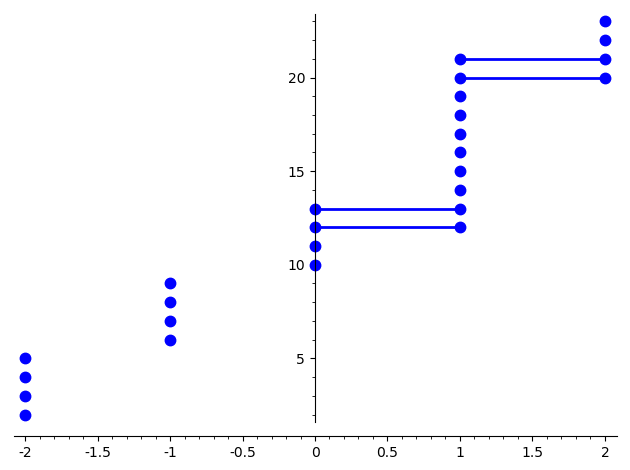

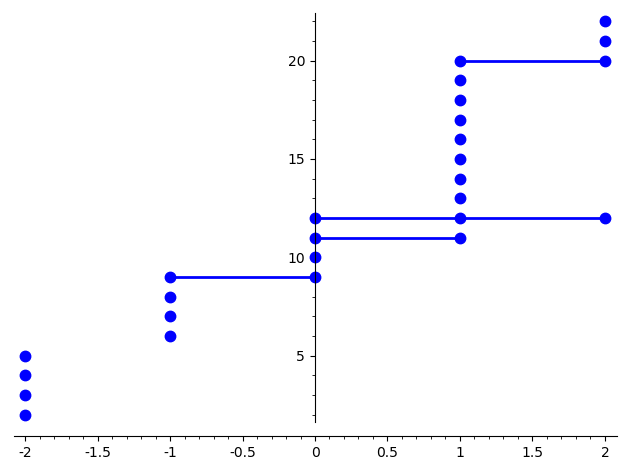

In [46]:
plot(B158[3])
plot(B160[3])

## 5. Detecting isomorphic rings

Bettina Eick, S.K. (2016) classify the modular cohomology rings of all $p$-groups of order $<100$ up to graded isomorphism.

The idea is to try all mappings of the generators that may possibly extend to an isomorphism, and user invariants to detect assignments that can *not* possibly extend to an isomorphism.

To give two quick examples, we show that our two ring presentations of $H^*(A_8,\mathbb F_2)$ are isomorphic, and we show that the examples with different bar codes are in fact not isomorphic.

In [47]:
print HA8.is_isomorphic(HA8_direct)

('1*b_2_0', '1*c_4_1', '1*b_3_0^2+1*b_6_3+1*b_2_0*c_4_1', '1*b_6_5', '1*b_3_1', '1*b_3_0', '1*b_5_1', '1*b_7_5', '1*b_7_6')


In [48]:
H64gp158.is_isomorphic(H64gp160)

False

**Question**
Is there an example of two prime power groups of the same order with isomorphic modular cohomology rings that can be distinguished by bar codes?

## Is there still time???
### Massey powers

Let $c$ be an element of mod-$p$ cohomology, and $i\in\mathbb N$. If the $p^i$-fold Massey product of $c$ exists, then it is possible to represent it by a well defined cohomology class --- the $i$-th *restricted Massey power* of $c$. A theorem of David Kraines (1965) says that if $p$ is odd then the first restricted Massey power of $c$ is equal to $-\beta P^1(c)$, where $\beta$ is the Bockstein operator associated with the exact coefficient sequence $0\to\mathbb Z_p\to\mathbb Z_{p^2} \to \mathbb Z_p\to 0$, and $P^1$ is the Steenrod $p$-th power.

Let's compute the first restricted Massey power for generators of the nil radical $H^*(E27;\mathbb F_3)$:

In [49]:
N = [HE27(str(x)) for x in HE27.nil_radical()]   # the nil radical
N
MP = [HE27.element_as_polynomial(c.massey_power(1)) for c in N]
MP

[a_1_0: 1-Cocycle in H^*(E27; GF(3)),
 a_1_1: 1-Cocycle in H^*(E27; GF(3)),
 a_3_4: 3-Cocycle in H^*(E27; GF(3)),
 a_3_5: 3-Cocycle in H^*(E27; GF(3))]

[-b_2_0: 2-Cocycle in H^*(E27; GF(3)),
 -b_2_3: 2-Cocycle in H^*(E27; GF(3)),
 b_2_0^2*a_1_1*a_3_5+b_2_0^2*a_1_0*a_3_4+b_2_0*c_6_8: 8-Cocycle in H^*(E27; GF(3)),
 -b_2_0^3*b_2_2-b_2_0^2*a_1_1*a_3_5-b_2_0^2*a_1_0*a_3_5+b_2_3*c_6_8+b_2_0*c_6_8: 8-Cocycle in H^*(E27; GF(3))]

Let's focus on $a_{3,4}$:

In [50]:
c  = N[2]
cP = MP[2]

There are four conjugacy classes of maximal elementary abelian subgroups of $E27$, all of order $9$.
And since it is known that they detect cohomology of $E27$, we compute these restrictions for $c$:

In [51]:
r1 = HE27.restriction_maps()[2][1]
r2 = HE27.restriction_maps()[3][1]
r3 = HE27.restriction_maps()[4][1]
r4 = HE27.restriction_maps()[5][1]
U = r1.codomain()

In [52]:
U.element_as_polynomial(r1(c))
U.element_as_polynomial(r2(c))
U.element_as_polynomial(r3(c))
U.element_as_polynomial(r4(c))

0: 3-Cocycle in H^*(SmallGroup(9,2); GF(3))

-c_2_2*a_1_0+c_2_1*a_1_1: 3-Cocycle in H^*(SmallGroup(9,2); GF(3))

-c_2_2*a_1_0+c_2_1*a_1_1: 3-Cocycle in H^*(SmallGroup(9,2); GF(3))

c_2_2*a_1_1-c_2_2*a_1_0+c_2_1*a_1_1: 3-Cocycle in H^*(SmallGroup(9,2); GF(3))

It is easy to compute the Bockstein and the Steenrod powers for the cohomology of elementary abelian groups. Since Bockstein and Steenrod powers commute with restriction maps, the formula of Kraines implies that $cP$ should be the *unique* element that restricts to 
 - $0$
 - $c_{2,1}c_{2,2}^3 - c_{2,1}^3c_{2,2}$
 - $c_{2,1}c_{2,2}^3 - c_{2,1}^3c_{2,2}$
 - $-c_{2,2}^4 - c_{2,1}c_{2,2}^3 + c_{2,1}^3c_{2,2}$.
 
It does:

In [53]:
U.element_as_polynomial(r1(cP))
U.element_as_polynomial(r2(cP))
U.element_as_polynomial(r3(cP))
U.element_as_polynomial(r4(cP))

0: 8-Cocycle in H^*(SmallGroup(9,2); GF(3))

c_2_1*c_2_2^3-c_2_1^3*c_2_2: 8-Cocycle in H^*(SmallGroup(9,2); GF(3))

c_2_1*c_2_2^3-c_2_1^3*c_2_2: 8-Cocycle in H^*(SmallGroup(9,2); GF(3))

-c_2_2^4+c_2_1*c_2_2^3-c_2_1^3*c_2_2: 8-Cocycle in H^*(SmallGroup(9,2); GF(3))